In [4]:
import cv2
import numpy as np
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [5]:
#load architecture of the model from json
json_file = open("mnist_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

In [6]:
#create the model from loaded
loaded_model = model_from_json(loaded_model_json)

#load the weights 
loaded_model.load_weights("mnist_model.h5")

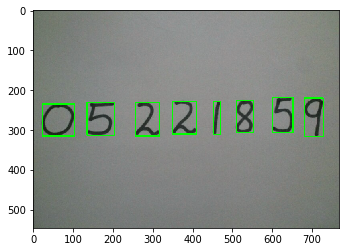

In [28]:
image = cv2.imread('./test_image_1.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

In [36]:
for digit in preprocessed_digits:   
    
    prediction = loaded_model.predict(digit.reshape(1, 28, 28, 1))  
        
    #print ("\n\n---------------------------------------\n\n")
    #print ("=========PREDICTION============ \n\n")
    #plt.imshow(digit.reshape(28, 28), cmap="gray")
    #plt.show()
    print ("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    #print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
        
    #hard_maxed_prediction = np.zeros(prediction.shape)
    #hard_maxed_prediction[0][np.argmax(prediction)] = 1
    #print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))  
    #print ("\n\n---------------------------------------\n\n")



Final Output: 0


Final Output: 2


Final Output: 5


Final Output: 8


Final Output: 2


Final Output: 8


Final Output: 9


Final Output: 5
